# Report

In [26]:
from itertools import zip_longest
import numpy as np
import matplotlib.pyplot as plt

In [9]:
logfiles = ["node1.log", "node2.log", "node3.log", "node4.log"]
logs = []
for logfile in logfiles:
    log = []
    with open(logfile, 'r') as f:
        for line in f:
            line = line.split(' ')
            transaction_id = line[0]
            generate_timestamp = float(line[1])
            execute_timestamp = float(line[2])
            log.append((transaction_id, execute_timestamp - generate_timestamp))
    logs.append(log)

In [11]:
# Check total ordering
length = len(logs[0])
for log in logs:
    if len(log) < length:
        length = len(log)

for i in range(length):
    id_value = logs[0][i][0]
    for log in logs:
        if log[i][0] != id_value:
            print("Not total order!")
            print(f"line: {i} {id_value} {log[i][0]}")

In [25]:
# Get delays
all_delays = []
for log in logs:
    delays = []
    for (_, delay) in log:
        delays.append(delay)
    all_delays.append(delays)

delay_data = []
for row in zip_longest(*all_delays, fillvalue=float('-inf')):
    delay_data.append(max(row))

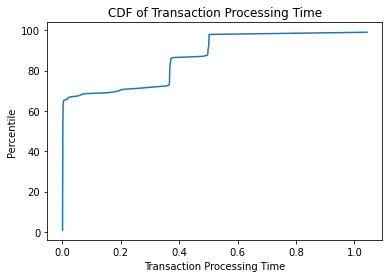

In [28]:
delay_data.sort()
percents = np.linspace(1, 99, len(delay_data))
plt.figure()
plt.plot(delay_data, percents)
plt.title("CDF of Transaction Processing Time")
plt.ylabel("Percentile")
plt.xlabel("Transaction Processing Time")
plt.show()